No handles with labels found to put in legend.


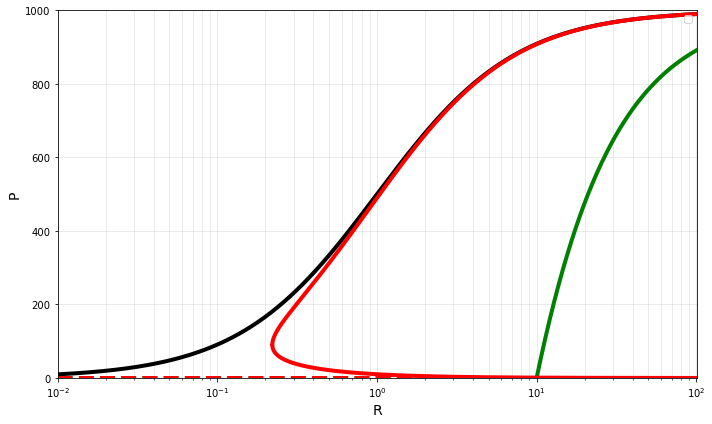

In [28]:
# Analytically computed STH hierarchy in biomolecular system models

import numpy as np
import matplotlib.pyplot as plt

alpha = 100
gamma = 1
D_T = 10
km = 100
kp = 100
km2 = 1000
kp2 = 0.1
R = np.logspace(-2, 2, 10000)

saturation = True
threshold = True
hysteresis = True

fig, ax = plt.subplots(figsize=(10, 6))

# Saturation
if saturation:
    P = (alpha/gamma) * D_T * R / (R + km/kp)
    ax.plot(R, P, linewidth=4, color='black')

# Threshold
if threshold:
    P_zero = np.zeros_like(R)
    ax.plot(R, P_zero, linewidth=4, color='green', linestyle='--')
    P = ((alpha/gamma) * D_T * R - (km*km2)/(kp*kp2)) / (R + km/kp)
    ax.plot(R, P, linewidth=4, color='green')

# Hysteresis
if hysteresis:
    c1 = km/kp
    c2 = (km*km2)/(kp*kp2)
    b = -(alpha/gamma) * D_T * R / (R + c1)
    c = c2 / (R + c1)
    
    P_zero = np.zeros_like(R)
    ax.plot(R, P_zero, linewidth=4, color='red', linestyle='--')
    
# Finding where discriminant becomes positive
    discriminant = b**2 - 4*c
    positive_mask = discriminant > 0
    
    if np.any(positive_mask):
        first = np.argmax(positive_mask)  # First True index
        R_subset = R[first:]
        b_subset = b[first:]
        c_subset = c[first:]
        disc_subset = discriminant[first:]
        
        P1 = (-b_subset + np.sqrt(disc_subset)) / 2
        P2 = (-b_subset - np.sqrt(disc_subset)) / 2
        
        ax.plot(R_subset, P1, linewidth=4, color='red')
        ax.plot(R_subset, P2, linewidth=4, color='red')

# Plotting (log scale on x-axis)
ax.set_xscale('log')
ax.set_xlim(0.01, 101)
ax.set_ylim(0, 1000)
ax.set_xlabel('R', fontsize=14)
ax.set_ylabel('P', fontsize=14)
ax.grid(True, alpha=0.3, which='both')
if saturation or threshold or hysteresis:
    ax.legend()
# ax.set_title('Saturation-Threshold-Hysteresis Hierarchy in Biomolecular Systems')
plt.tight_layout()
plt.show()
# plt.savefig('plt.png')

In [9]:
# # GB computation for saturation (Model S)

# # Defining the polynomial ring and variables
# R = PolynomialRing(QQ, 'DU,DR,P,D,R,kplus,kminus,alpha,gamma', order='lex')
# DU, DR, P, D, Rp, kplus, kminus, alpha, gamma = R.gens()

# D = 10 
# kplus = 100 
# kminus = 100 
# alpha  = 100 
# gamma = 1
# # R = 10

# # Define the polynomial equations
# f1 = DU + DR - D                             # DNA conservation
# f2 = kplus*Rp*DU - kminus*DR                 # Binding equilibrium
# f3 = alpha*DR - gamma*P                      # Protein steady-state

# #  ideal construction
# I = R.ideal(f1, f2, f3)

# # Computing the Groebner basis
# G = I.groebner_basis()
# show(G)
# print(G)

In [29]:
# Model S (Saturation model)

# Defining polynomial ring and variables
R = PolynomialRing(QQ, 'DU,DR,P,D,Rp,kplus,kminus,alpha,gamma', order='lex')
DU, DR, P, D, Rp, kplus, kminus, alpha, gamma = R.gens()

f1 = DU + DR - D                    # DNA conservation
f2 = kplus*Rp*DU - kminus*DR        # Binding equilibrium
f3 = alpha*DR - gamma*P             # Protein steady-state

# Constructing ideal
I = R.ideal(f1, f2, f3)

# Computing Basis
G = I.groebner_basis()
# show(G)
print("Groebner basis:")
for g in G:
    print(g)

# Eliminating DU and DR for getting the relation involving P

I_elim = I.elimination_ideal([DU, DR])
G_elim = I_elim.groebner_basis()
print("\nElimination Groebner basis (in P, D, Rp, kplus, kminus, alpha, gamma):")
for g in G_elim:
    print(g)

# Now solving the equations symbolically 
var('DU, DR, P, D, Rp, kplus, kminus, alpha, gamma')
f1s = DU + DR - D
f2s = kplus*Rp*DU - kminus*DR
f3s = alpha*DR - gamma*P
sol = solve([f1s, f2s, f3s], [DU, DR, P], solution_dict=True)

print("\nSymbolic solution:")
show(sol[0])

# Extracting the expression for P
P_expr = sol[0][P].simplify_full()
print("\nSimplified expression for P:")
show(P_expr)

# Substituting numeric parameters for getting protein expression in terms of parameters:
P_numeric = P_expr.subs({D:10, kplus:100, kminus:100, alpha:100, gamma:1})
print("\nSimplified numeric expression (with given parameters):")
show(P_numeric)

Groebner basis:
DU + DR - D
DR*Rp*kplus + DR*kminus - D*Rp*kplus
DR*alpha - P*gamma
P*Rp*kplus*gamma + P*kminus*gamma - D*Rp*kplus*alpha

Elimination Groebner basis (in P, D, Rp, kplus, kminus, alpha, gamma):
P*Rp*kplus*gamma + P*kminus*gamma - D*Rp*kplus*alpha

Symbolic solution:


{DU: D*kminus/(Rp*kplus + kminus),
 DR: D*Rp*kplus/(Rp*kplus + kminus),
 P: D*Rp*alpha*kplus/(Rp*gamma*kplus + gamma*kminus)}


Simplified expression for P:


D*Rp*alpha*kplus/(Rp*gamma*kplus + gamma*kminus)


Simplified numeric expression (with given parameters):


1000*Rp/(Rp + 1)

In [12]:
# # Threshold

# # Define the polynomial ring and variables
# R = PolynomialRing(QQ, 'DU,DP,DPR,P,D,R,kplus,kminus,alpha,gamma', order='lex')
# DU, DP, DPR, P, D, Rp, kplus, kminus, alpha, gamma = R.gens()

# # Parameters
# D = 10 
# kplus = 100 
# kminus = 100 
# alpha  = 100 
# gamma = 1
# # R = 10
# ktwoplus = 0.1
# ktwominus = 1000

# # Define the equations (steady-state conditions)
# f1 = DU + DP + DPR - D                               
# f2 = kplus*P*DU - kminus*DP 
# f3 = ktwoplus*Rp*DP - ktwominus*DPR 
# f4 = alpha*DPR - gamma*P                        


# # Construct the ideal
# I = R.ideal(f1, f2, f3, f4)

# # Compute the Groebner basis
# G = I.groebner_basis()
# show(G)
# print(G)

In [30]:
# Model T (Threshold model)

# Defining polynomial ring and symbolic variables
R = PolynomialRing(QQ, 'DU,DP,DPR,P,D,Rp,kplus,kminus,ktwoplus,ktwominus,alpha,gamma', order='lex')
DU, DP, DPR, P, D, Rp, kplus, kminus, ktwoplus, ktwominus, alpha, gamma = R.gens()

f1 = DU + DP + DPR - D
f2 = kplus*P*DU - kminus*DP
f3 = ktwoplus*Rp*DP - ktwominus*DPR
f4 = alpha*DPR - gamma*P

# Groebner basis computations
I = R.ideal(f1, f2, f3, f4)
G = I.groebner_basis()

print("Groebner basis:")
for g in G:
    print(g)

# Eliminating DU, DP, DPR
I_elim = I.elimination_ideal([DU, DP, DPR])
G_elim = I_elim.groebner_basis()
print("\nElimination Groebner basis (relations in P, D, Rp, kplus, kminus, ktwoplus, ktwominus, alpha, gamma):")
for g in G_elim:
    print(g)

# Solving symbolically using symbolic 
#    Using sage 'var' to get symbolic expressions suitable for solve()
var('DU_sym DP_sym DPR_sym P_sym D_sym Rp_sym kplus_sym kminus_sym ktwoplus_sym ktwominus_sym alpha_sym gamma_sym')

f1s = DU_sym + DP_sym + DPR_sym - D_sym
f2s = kplus_sym*P_sym*DU_sym - kminus_sym*DP_sym
f3s = ktwoplus_sym*Rp_sym*DP_sym - ktwominus_sym*DPR_sym
f4s = alpha_sym*DPR_sym - gamma_sym*P_sym

sols = solve([f1s, f2s, f3s, f4s], [DU_sym, DP_sym, DPR_sym, P_sym], solution_dict=True)
print("\nSymbolic solution set (may include trivial P=0):")
for s in sols:
    show(s)

# Extracting P solutions and simplify
P_solutions = []
for s in sols:
    if P_sym in s:
        Ps = s[P_sym].simplify_full()
        P_solutions.append(Ps)

print("\nExtracted P solutions (simplified):")
for ps in P_solutions:
    show(ps)

# solving for non-zero P by algebraic manipulation
a = kplus_sym / kminus_sym
b = (ktwoplus_sym * Rp_sym) / ktwominus_sym
P_nonzero = ( (alpha_sym/gamma_sym) * a * b * D_sym - 1 ) / ( a * (1 + b) )
print("\nAlternative compact expression for non-zero P:")
show(simplify(P_nonzero))

# substituting numeric parameters and solving for P
P_example = P_nonzero.subs({D_sym:10, kplus_sym:100, kminus_sym:100, ktwoplus_sym:50, ktwominus_sym:200, alpha_sym:100, gamma_sym:1})
show(P_example)

Groebner basis:
DU + DP + DPR - D
DP*P*kplus + DP*kminus + DPR*P*kplus - P*D*kplus
DP*Rp*ktwoplus - DPR*ktwominus
DPR*P*Rp*kplus*ktwoplus + DPR*P*kplus*ktwominus + DPR*kminus*ktwominus - P*D*Rp*kplus*ktwoplus
DPR*alpha - P*gamma
P^2*Rp*kplus*ktwoplus*gamma + P^2*kplus*ktwominus*gamma - P*D*Rp*kplus*ktwoplus*alpha + P*kminus*ktwominus*gamma

Elimination Groebner basis (relations in P, D, Rp, kplus, kminus, ktwoplus, ktwominus, alpha, gamma):
P^2*Rp*kplus*ktwoplus*gamma + P^2*kplus*ktwominus*gamma - P*D*Rp*kplus*ktwoplus*alpha + P*kminus*ktwominus*gamma

Symbolic solution set (may include trivial P=0):


{DU_sym: D_sym, DP_sym: 0, DPR_sym: 0, P_sym: 0}

{DU_sym: gamma_sym*kminus_sym*ktwominus_sym/(Rp_sym*alpha_sym*kplus_sym*ktwoplus_sym),
 DP_sym: (D_sym*Rp_sym*alpha_sym*kplus_sym*ktwominus_sym*ktwoplus_sym - gamma_sym*kminus_sym*ktwominus_sym^2)/(Rp_sym^2*alpha_sym*kplus_sym*ktwoplus_sym^2 + Rp_sym*alpha_sym*kplus_sym*ktwominus_sym*ktwoplus_sym),
 DPR_sym: (D_sym*Rp_sym*alpha_sym*kplus_sym*ktwoplus_sym - gamma_sym*kminus_sym*ktwominus_sym)/(Rp_sym*alpha_sym*kplus_sym*ktwoplus_sym + alpha_sym*kplus_sym*ktwominus_sym),
 P_sym: (D_sym*Rp_sym*alpha_sym*kplus_sym*ktwoplus_sym - gamma_sym*kminus_sym*ktwominus_sym)/(Rp_sym*gamma_sym*kplus_sym*ktwoplus_sym + gamma_sym*kplus_sym*ktwominus_sym)}


Extracted P solutions (simplified):


0

(D_sym*Rp_sym*alpha_sym*kplus_sym*ktwoplus_sym - gamma_sym*kminus_sym*ktwominus_sym)/(Rp_sym*gamma_sym*kplus_sym*ktwoplus_sym + gamma_sym*kplus_sym*ktwominus_sym)


Alternative compact expression for non-zero P:


(D_sym*Rp_sym*alpha_sym*kplus_sym*ktwoplus_sym/(gamma_sym*kminus_sym*ktwominus_sym) - 1)*kminus_sym/(kplus_sym*(Rp_sym*ktwoplus_sym/ktwominus_sym + 1))

4*(250*Rp_sym - 1)/(Rp_sym + 4)

In [67]:
# Model H (Hysteresis model)

# Defining polynomial ring
R = PolynomialRing(QQ, 'DU,DP2,DP2R,P,P2,D,Rp,kplus,kminus,gamma,ktwoplus,ktwominus,kthreeplus,kthreeminus,alpha', order='lex')
DU, DP2, DP2R, P, P2, D, Rp, kplus, kminus, gamma, ktwoplus, ktwominus, kthreeplus, kthreeminus, alpha = R.gens()

f1 = DU + DP2 + DP2R - D                             
f2 = kplus*P^2 - kminus*P2                 
f3 = ktwoplus*DU*P2 - ktwominus*DP2                  
f4 = kthreeplus*Rp*DP2 - kthreeminus*DP2R            
f5 = alpha*DP2R - gamma*P                            

# GB Computation
I = R.ideal([f1, f2, f3, f4, f5])
G = I.groebner_basis()
# show(G)
A=len(G)
show(A)
print("Groebner basis")
for g in G:
    print(g)

# eliminating DU, DP2, DP2R, P2 to get relation for P
elim_vars = [DU, DP2, DP2R, P2]
I_elim = I.elimination_ideal(elim_vars)
G_elim = I_elim.groebner_basis()
print("\nElimination Groebner basis (in P, D, Rp, and parameters):")
for g in G_elim:
    print(g)

# Solving the original system symbolically
var('DU_s DP2_s DP2R_s P_s P2_s D_s Rp_s kplus_s kminus_s gamma_s ktwoplus_s ktwominus_s kthreeplus_s kthreeminus_s alpha_s')
f1s = DU_s + DP2_s + DP2R_s - D_s
f2s = kplus_s*(P_s)^2 - kminus_s*P2_s
f3s = ktwoplus_s*DU_s*P2_s - ktwominus_s*DP2_s
f4s = kthreeplus_s*Rp_s*DP2_s - kthreeminus_s*DP2R_s
f5s = alpha_s*DP2R_s - gamma_s*P_s

sol = solve([f1s, f2s, f3s, f4s, f5s], [DU_s, DP2_s, DP2R_s, P2_s, P_s], solution_dict=True)
print("\nSymbolic solutions (showing P):")
for s in sol:
    show(s)            

# extracting the P solutions and simplify
P_sols = []
for s in sol:
    if P_s in s:
        P_sols.append(s[P_s].simplify_full())

print("\nSimplified expression(s) for P:")
for ps in P_sols:
    show(ps)

# Numeric P
params = {D_s:10, kplus_s:100.0, kminus_s:100.0, gamma_s:1, ktwoplus_s:100.0, ktwominus_s:100.0, kthreeplus_s:100.0, kthreeminus_s:100.0, alpha_s:100, Rp_s:1.0}
for ps in P_sols:
    print("P numeric:", ps.subs(params).simplify_full())

11

Groebner basis
DU + DP2 + DP2R - D
DP2*P2*ktwoplus + DP2*ktwominus + DP2R*P2*ktwoplus - P2*D*ktwoplus
DP2*Rp*kthreeplus - DP2R*kthreeminus
DP2R*P2*Rp*ktwoplus*kthreeplus + DP2R*P2*ktwoplus*kthreeminus + DP2R*ktwominus*kthreeminus - P2*D*Rp*ktwoplus*kthreeplus
DP2R*alpha - P*gamma
P^2*kplus - P2*kminus
P*P2*D*Rp*kplus*ktwoplus*kthreeplus*alpha - P2^2*Rp*kminus*gamma*ktwoplus*kthreeplus - P2^2*kminus*gamma*ktwoplus*kthreeminus - P2*kminus*gamma*ktwominus*kthreeminus
P*P2*D*kplus*gamma*ktwoplus*kthreeminus*alpha + P*D*kplus*gamma*ktwominus*kthreeminus*alpha + P2^2*Rp*kminus*gamma^2*ktwoplus*kthreeplus + P2^2*kminus*gamma^2*ktwoplus*kthreeminus - P2*D^2*Rp*kplus*ktwoplus*kthreeplus*alpha^2 + P2*kminus*gamma^2*ktwominus*kthreeminus
P*P2*Rp*gamma*ktwoplus*kthreeplus + P*P2*gamma*ktwoplus*kthreeminus + P*gamma*ktwominus*kthreeminus - P2*D*Rp*ktwoplus*kthreeplus*alpha
P*D*Rp*kplus*gamma*ktwominus*kthreeplus*kthreeminus*alpha + P2^2*Rp^2*kminus*gamma^2*ktwoplus*kthreeplus^2 + 2*P2^2*Rp*kminus*g

{DU_s: 1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s + sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*(Rp_s*gamma_s^2*kminus_s*kplus_s*kthreeminus_s*kthreeplus_s + gamma_s^2*kminus_s*kplus_s*kthreeminus_s^2)*ktwominus_s*ktwoplus_s))/(Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s),
 DP2_s: 1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeminus_s*kthreeplus_s*ktwoplus_s - sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*(Rp_s*gamma_s^2*kminus_s*kplus_s*kthreeminus_s*kthreeplus_s + gamma_s^2*kminus_s*kplus_s*kthreeminus_s^2)*ktwominus_s*ktwoplus_s)*kthreeminus_s)/((Rp_s^2*alpha_s*kplus_s*kthreeplus_s^2 + Rp_s*alpha_s*kplus_s*kthreeminus_s*kthreeplus_s)*ktwoplus_s),
 DP2R_s: 1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s - sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*(Rp_s*gamma_s^2*kminus_s*kplus_s*kthreeminus_s*kthreeplus_s + gamma_s^2*kminus_s*kplus_s*kthreeminus_s^2)*ktwominus_s*ktwoplus_s))/((Rp_s*alpha_s*kplus_s*kthreeplus_s + alpha_s*kplus_s*kthreeminus_s)*ktwoplus_s),
 P2_s: 1/2*(D_s^2*Rp_s^2*alpha_s^2*kplus_s*kthreeplus_s^2*ktwoplus_s - sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*(Rp_s*gamma_s^2*kminus_s*kplus_s*kthreeminus_s*kthreeplus_s + gamma_s^2*kminus_s*kplus_s*kthreeminus_s^2)*ktwominus_s*ktwoplus_s)*D_s*Rp_s*alpha_s*kthreeplus_s - 2*(Rp_s*gamma_s^2*kminus_s*kthreeminus_s*kthreeplus_s + gamma_s^2*kminus_s*kthreeminus_s^2)*ktwominus_s)/((Rp_s^2*gamma_s^2*kminus_s*kthreeplus_s^2 + 2*Rp_s*gamma_s^2*kminus_s*kthreeminus_s*kthreeplus_s + gamma_s^2*kminus_s*kthreeminus_s^2)*ktwoplus_s),
 P_s: 1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s - sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*(Rp_s*gamma_s^2*kminus_s*kplus_s*kthreeminus_s*kthreeplus_s + gamma_s^2*kminus_s*kplus_s*kthreeminus_s^2)*ktwominus_s*ktwoplus_s))/((Rp_s*gamma_s*kplus_s*kthreeplus_s + gamma_s*kplus_s*kthreeminus_s)*ktwoplus_s)}

{DU_s: 1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s - sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*(Rp_s*gamma_s^2*kminus_s*kplus_s*kthreeminus_s*kthreeplus_s + gamma_s^2*kminus_s*kplus_s*kthreeminus_s^2)*ktwominus_s*ktwoplus_s))/(Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s),
 DP2_s: 1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeminus_s*kthreeplus_s*ktwoplus_s + sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*(Rp_s*gamma_s^2*kminus_s*kplus_s*kthreeminus_s*kthreeplus_s + gamma_s^2*kminus_s*kplus_s*kthreeminus_s^2)*ktwominus_s*ktwoplus_s)*kthreeminus_s)/((Rp_s^2*alpha_s*kplus_s*kthreeplus_s^2 + Rp_s*alpha_s*kplus_s*kthreeminus_s*kthreeplus_s)*ktwoplus_s),
 DP2R_s: 1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s + sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*(Rp_s*gamma_s^2*kminus_s*kplus_s*kthreeminus_s*kthreeplus_s + gamma_s^2*kminus_s*kplus_s*kthreeminus_s^2)*ktwominus_s*ktwoplus_s))/((Rp_s*alpha_s*kplus_s*kthreeplus_s + alpha_s*kplus_s*kthreeminus_s)*ktwoplus_s),
 P2_s: 1/2*(D_s^2*Rp_s^2*alpha_s^2*kplus_s*kthreeplus_s^2*ktwoplus_s + sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*(Rp_s*gamma_s^2*kminus_s*kplus_s*kthreeminus_s*kthreeplus_s + gamma_s^2*kminus_s*kplus_s*kthreeminus_s^2)*ktwominus_s*ktwoplus_s)*D_s*Rp_s*alpha_s*kthreeplus_s - 2*(Rp_s*gamma_s^2*kminus_s*kthreeminus_s*kthreeplus_s + gamma_s^2*kminus_s*kthreeminus_s^2)*ktwominus_s)/((Rp_s^2*gamma_s^2*kminus_s*kthreeplus_s^2 + 2*Rp_s*gamma_s^2*kminus_s*kthreeminus_s*kthreeplus_s + gamma_s^2*kminus_s*kthreeminus_s^2)*ktwoplus_s),
 P_s: 1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s + sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*(Rp_s*gamma_s^2*kminus_s*kplus_s*kthreeminus_s*kthreeplus_s + gamma_s^2*kminus_s*kplus_s*kthreeminus_s^2)*ktwominus_s*ktwoplus_s))/((Rp_s*gamma_s*kplus_s*kthreeplus_s + gamma_s*kplus_s*kthreeminus_s)*ktwoplus_s)}

{DU_s: D_s, DP2_s: 0, DP2R_s: 0, P2_s: 0, P_s: 0}


Simplified expression(s) for P:


1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s - sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*(Rp_s*gamma_s^2*kminus_s*kplus_s*kthreeminus_s*kthreeplus_s + gamma_s^2*kminus_s*kplus_s*kthreeminus_s^2)*ktwominus_s*ktwoplus_s))/((Rp_s*gamma_s*kplus_s*kthreeplus_s + gamma_s*kplus_s*kthreeminus_s)*ktwoplus_s)

1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s + sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*(Rp_s*gamma_s^2*kminus_s*kplus_s*kthreeminus_s*kthreeplus_s + gamma_s^2*kminus_s*kplus_s*kthreeminus_s^2)*ktwominus_s*ktwoplus_s))/((Rp_s*gamma_s*kplus_s*kthreeplus_s + gamma_s*kplus_s*kthreeminus_s)*ktwoplus_s)

0

P numeric: 0.001000002000004053
P numeric: 499.9989999980001
P numeric: 0


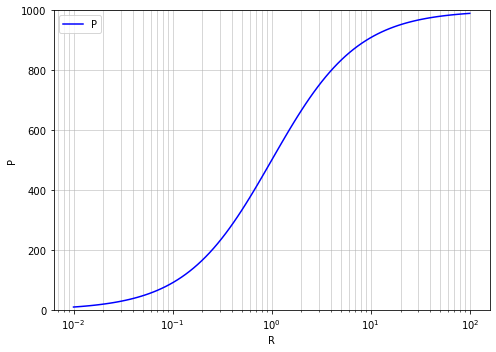

In [39]:
# Saturation with GB and plot

import numpy as np

var('x1 x2 x3')

D = 10
kplus = 100
kminus = 100
a = 100
g = 1
# ktwoplus = 0.1
# ktwominus = 1000

Rp_values = np.logspace(-2, 2, 100)  
x3_list = []

for Rp_val in Rp_values:
    R = PolynomialRing(QQ, 'x1,x2,x3', order='lex')
    x1R, x2R, x3R = R.gens()
    f1 = x1R + x2R - D
    f2 = kplus*Rp_val*x1R - kminus*x2R
    f3 = a*x2R - g*x3R
    I = R.ideal([f1, f2, f3])
    G = I.groebner_basis()

# Converting Groebner basis polynomials to symbolic expressions
    groebner_eqns = [SR(poly) for poly in G]
    
# Now, solving the Groebner basis equations
    sol = solve(groebner_eqns, x1, x2, x3, solution_dict=True)
    
# Extracting x3 value
    if sol:
        val_x3 = RR(sol[0][x3])
        x3_list.append(val_x3 if val_x3 > 0 else float('nan'))
    else:
        x3_list.append(float('nan'))
# show(x3_list)
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))

# Zero line
# P_zero = np.zeros_like(Rp_values)
# plt.plot(Rp_values, P_zero, linewidth=4, color='green', linestyle='--', label='Zero') 

plt.plot(Rp_values, x3_list, color='blue', label='P')
plt.xscale('log')           
plt.ylim(0, 1000)          
plt.xlabel('R')
plt.ylabel('P')
plt.grid(True, which="both", lw=0.5)
plt.legend()
plt.tight_layout()
plt.show()
# show(x3_list)
# plt.savefig('plt.jpg')


Dissociation constant Kd = kminus/kplus = 1
Maximum P = (alpha/gamma)*D = 1000

Behavior:
  • When R << Kd (1): P ≈ (alpha/gamma)*D*(R/Kd) [Linear growth]
  • When R >> Kd (1): P ≈ (alpha/gamma)*D = 1000 [Saturated]
  • At R = Kd (1): P = 500 [Half-maximum]

P at R=0.01: 9.9010
P at R=1 (half-max): 499.8849
P at R=100: 990.0990
Maximum P (saturation): 1000
Groebner Basis at Sample Points

Groebner basis for R=0.0100000000000000:
  G[0]: DU - 1000/101
  G[1]: DP - 10/101
  G[2]: P - 1000/101

R =   0.01:
  Expected (Analytical): P = 9.9010
  Groebner Basis:        P = 9.9010
  Difference:            ΔP = 0.000000

R =   1.00:
  Expected (Analytical): P = 499.8849
  Groebner Basis:        P = 500.0000
  Difference:            ΔP = 0.115141

R =  10.00:
  Expected (Analytical): P = 909.0719
  Groebner Basis:        P = 909.0909
  Difference:            ΔP = 0.019033

R = 100.00:
  Expected (Analytical): P = 990.0990
  Groebner Basis:        P = 990.0990
  Difference:            ΔP = 0.00

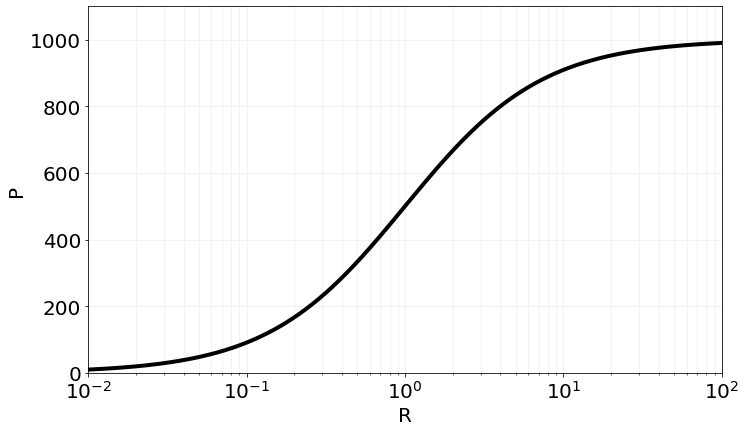

In [58]:
# S Model

import numpy as np
import matplotlib.pyplot as plt

# Symbolic variables
var('DU DP P')

# Parameters
D = 10
kplus = 100
kminus = 100
alpha = 100
gamma = 1


Kd = kminus/kplus
print(f"\nDissociation constant Kd = kminus/kplus = {Kd}")
print(f"Maximum P = (alpha/gamma)*D = {(alpha/gamma)*D}")

print("\nBehavior:")
print(f"  • When R << Kd ({Kd}): P ≈ (alpha/gamma)*D*(R/Kd) [Linear growth]")
print(f"  • When R >> Kd ({Kd}): P ≈ (alpha/gamma)*D = {(alpha/gamma)*D} [Saturated]")
print(f"  • At R = Kd ({Kd}): P = {(alpha/gamma)*D/2} [Half-maximum]")

# Numerical Soln

Rp_values = np.logspace(-2, 2, 10000)

P_analytical = (alpha/gamma) * D * Rp_values / (Rp_values + kminus/kplus)


print(f"\nP at R=0.01: {P_analytical[0]:.4f}")
print(f"P at R={Kd} (half-max): {P_analytical[np.argmin(np.abs(Rp_values - Kd))]:.4f}")
print(f"P at R=100: {P_analytical[-1]:.4f}")
print(f"Maximum P (saturation): {(alpha/gamma)*D}")

print("Groebner Basis at Sample Points")


sample_Rp = [0.01, 1.0, 10.0, 100.0]

for Rp_val in sample_Rp:
     
    R_ring = PolynomialRing(QQ, 'DU,DP,P', order='lex')
    DU_R, DP_R, P_R = R_ring.gens()
    
    f1 = DU_R + DP_R - D
    f2 = kplus*Rp_val*DU_R - kminus*DP_R
    f3 = alpha*DP_R - gamma*P_R
    
    I = R_ring.ideal([f1, f2, f3])
    G = I.groebner_basis()
    
    # Show Groebner basis for first point
    if Rp_val == sample_Rp[0]:
        print(f"\nGroebner basis for R={Rp_val}:")
        for i, g_poly in enumerate(G):
            print(f"  G[{i}]: {g_poly}")
    
    # Converting symbolically and solving
    groebner_eqns = [SR(poly) for poly in G]
    sol = solve(groebner_eqns, DU, DP, P, solution_dict=True)
    
    # Expected value from analytical formula
    idx = np.argmin(np.abs(Rp_values - Rp_val))
    P_expected = P_analytical[idx]
    
    print(f"\nR = {Rp_val:6.2f}:")
    print(f"  Expected (Analytical): P = {P_expected:.4f}")
    
    if sol and len(sol) > 0:
        # Extract P value from solution
        val_P = sol[0][P]
        try:
            if hasattr(val_P, 'n'):
                P_gb = float(val_P.n())
            else:
                P_gb = float(val_P)
            
            print(f"  Groebner Basis:        P = {P_gb:.4f}")
            print(f"  Difference:            ΔP = {abs(P_gb - P_expected):.6f}")
            
            # showing other variables as well
            
            val_DU = sol[0][DU]
            val_DP = sol[0][DP]
            DU_val = float(val_DU.n()) if hasattr(val_DU, 'n') else float(val_DU)
            DP_val = float(val_DP.n()) if hasattr(val_DP, 'n') else float(val_DP)
            
            
        except Exception as e:
            print(f"  Error extracting value: {e}")
    else:
        print(" No solution found!")


# Plotting saturation curve

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Rp_values, P_analytical, linewidth=4, color='black')

P_samples = []
for Rp_val in sample_Rp:
    R_ring = PolynomialRing(QQ, 'DU,DP,P', order='lex')
    DU_R, DP_R, P_R = R_ring.gens()
    
    f1 = DU_R + DP_R - D
    f2 = kplus*Rp_val*DU_R - kminus*DP_R
    f3 = alpha*DP_R - gamma*P_R
    
    I = R_ring.ideal([f1, f2, f3])
    G = I.groebner_basis()
    groebner_eqns = [SR(poly) for poly in G]
    sol = solve(groebner_eqns, DU, DP, P, solution_dict=True)
    
    if sol and len(sol) > 0:
        val_P = sol[0][P]
        P_val = float(val_P.n()) if hasattr(val_P, 'n') else float(val_P)
        P_samples.append(P_val)
    else:
        P_samples.append(0)

ax.set_xscale('log')
ax.set_xlim(0.01, 101)
ax.set_ylim(0, 1100)
ax.set_xlabel('R', fontsize=20)
ax.set_ylabel('P', fontsize=20)
ax.grid(True, which="both", lw=0.5, alpha=0.3)
# ax.legend(fontsize=10, loc='lower right')
# ax.legend(fontsize=18, loc='upper left', framealpha=0.9)
# ax.set_title('Saturation', fontsize=14)
plt.tight_layout()
ax.tick_params(axis='x', labelsize=20)  
ax.tick_params(axis='y', labelsize=20)
plt.savefig('S.png', dpi=600, bbox_inches='tight')
plt.show()

Groebner Basis Method
Groebner basis:
DU + DP + DPR - D
DP*P*kplus + DP*kminus + DPR*P*kplus - P*D*kplus
DP*Rp*ktwoplus - DPR*ktwominus
DPR*P*Rp*kplus*ktwoplus + DPR*P*kplus*ktwominus + DPR*kminus*ktwominus - P*D*Rp*kplus*ktwoplus
DPR*alpha - P*gamma
P^2*Rp*kplus*ktwoplus*gamma + P^2*kplus*ktwominus*gamma - P*D*Rp*kplus*ktwoplus*alpha + P*kminus*ktwominus*gamma
Analytical Method
P at R=0.01: -9891.0891
P at R=1: -4501.2665
P at R=100: 891.0891

P = [(a/g)*D*R - (kminus*ktwominus)/(kplus*ktwoplus)] / (R + kminus/kplus)

Groebner Basis checked numerically for sample input points


[x1 + 1000001/100*x4 - 10, x2 - 10000*x4, x3 - 1/100*x4, x4^2 + 999000/1000001*x4]

[0.000000000000000]

[x1 + 10001/100*x4 - 10, x2 - 100*x4, x3 - 1/100*x4, x4^2 + 9000/10001*x4]

[0.000000000000000, 0.000000000000000]

[x1 + 1001/100*x4 - 10, x2 - 10*x4, x3 - 1/100*x4, x4^2]

[0.000000000000000, 0.000000000000000, 0.000000000000000]

[x1 + 101/100*x4 - 10, x2 - x4, x3 - 1/100*x4, x4^2 - 900/101*x4]

[0.000000000000000, 0.000000000000000, 0.000000000000000, 8.910891089108912]

array([6.27863086e-01, 1.46446192e+00, 2.30043028e+00, ...,
       8.90890275e+02, 8.90989737e+02, 8.91089109e+02])

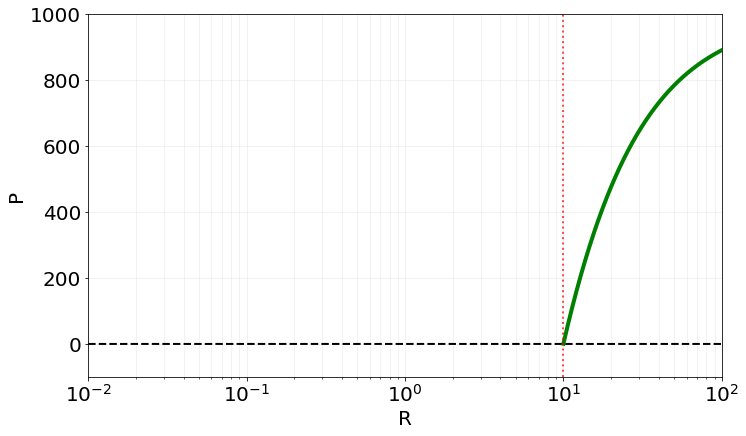

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Method : GB
print("Groebner Basis Method")

# Defining polynomial ring and symbolic variables
R = PolynomialRing(QQ, 'DU,DP,DPR,P,D,Rp,kplus,kminus,ktwoplus,ktwominus,alpha,gamma', order='lex')
DU, DP, DPR, P, D, Rp, kplus, kminus, ktwoplus, ktwominus, alpha, gamma = R.gens()

f1 = DU + DP + DPR - D
f2 = kplus*P*DU - kminus*DP
f3 = ktwoplus*Rp*DP - ktwominus*DPR
f4 = alpha*DPR - gamma*P

# Groebner basis computations
I = R.ideal(f1, f2, f3, f4)
G = I.groebner_basis()

print("Groebner basis:")
for g in G:
    print(g)

# Symbolic variables
var('x1 x2 x3 x4 Rp')  # here, x1 is DU , x2 = DP , x3 = DPR ,and x4 = P 

D = 10
kplus = 100
kminus = 100
a = 100
g = 1
ktwoplus = 0.1
ktwominus = 1000

# Method 1: Analytical Solution 
print("Analytical Method")

# Prepare logspaced Rp values
Rp_values = np.logspace(-2, 2, 10000)

# Direct analytical formula from threshold model this we have derived from solving the system algebraically
P_analytical = ((a/g)*D*Rp_values - (kminus*ktwominus)/(kplus*ktwoplus)) / (Rp_values + kminus/kplus)

print(f"P at R=0.01: {P_analytical[0]:.4f}")
print(f"P at R=1: {P_analytical[np.argmin(np.abs(Rp_values - 1))]:.4f}")
print(f"P at R=100: {P_analytical[-1]:.4f}")
print()

print("P = [(a/g)*D*R - (kminus*ktwominus)/(kplus*ktwoplus)] / (R + kminus/kplus)")
print()

# Method 3: Solving Groebner Basis Numerically
print("Groebner Basis checked numerically for sample input points")


sample_Rp = [0.01, 1.0, 10.0, 100.0]
x4_samples = []

for Rp_val in sample_Rp:
    
# Polynomial ring
    R_ring = PolynomialRing(QQ, 'x1,x2,x3,x4', order='lex')
    x1R, x2R, x3R, x4R = R_ring.gens()
    
    f1 = x1R + x2R + x3R - D
    f2 = kplus*x4R*x1R - kminus*x2R
    f3 = ktwoplus*Rp_val*x2R - ktwominus*x3R
    f4 = a*x3R - g*x4R
    
# Computing Groebner basis
    I = R_ring.ideal([f1, f2, f3, f4])
    G = I.groebner_basis()
    show(G)
    
# solving
    groebner_eqns = [SR(poly) for poly in G]
    sol = solve(groebner_eqns, x1, x2, x3, x4, solution_dict=True)
    
# Finding best positive solution
    best_x4 = 0.0
    for s in sol:
        val_x4 = float(s[x4].n()) if hasattr(s[x4], 'n') else float(s[x4])
        if val_x4 > best_x4:
            best_x4 = val_x4
    
    x4_samples.append(best_x4)
    show(x4_samples)

# Plotting

fig, ax = plt.subplots(figsize=(10, 6))

# Zero line
P_zero = np.zeros_like(Rp_values)
ax.plot(Rp_values, P_zero, linewidth=2, color='black', linestyle='--')

# Filter to plot only positive P values
mask_positive = P_analytical >= 0
Rp_positive = Rp_values[mask_positive]
P_positive = P_analytical[mask_positive]

# Plot analytical solution (only positive values)
ax.plot(Rp_positive, P_positive, color='green', linewidth=4, )
show(P_positive)
# Mark threshold point (where P crosses zero)
# Threshold occurs when numerator = 0:
# (a/g)*D*R = (kminus*ktwominus)/(kplus*ktwoplus)
R_threshold = (kminus*ktwominus)/(kplus*ktwoplus) / ((a/g)*D)
ax.axvline(R_threshold, color='red', linestyle=':', linewidth=2, alpha=0.7)

ax.set_xscale('log')
ax.set_xlim(0.01, 101)
ax.set_ylim(-100, 1000)
ax.set_xlabel('R', fontsize=20)
ax.set_ylabel('P', fontsize=20)
ax.grid(True, which="both", lw=0.5, alpha=0.3)
# ax.legend(fontsize=20, loc='upper left', framealpha=0.9)
plt.tight_layout()
ax.tick_params(axis='x', labelsize=20)  
ax.tick_params(axis='y', labelsize=20)
plt.savefig('Thr.png', dpi=600, bbox_inches='tight')

Analytical solved hysteresis - Deriving Quadratic Equation

c1 = kminus/kplus = 1
c2 = (kminus*ktwominus)/(kplus*ktwoplus) = 10000.0000000000

Quadratic equation: P² + b(R)·P + c(R) = 0
where:
  b(R) = -(alpha/gamma)*D*R / (R + c1)
  c(R) = c2 / (R + c1)
Hysteresis Curve
Bistability begins at R = 0.2211
Solutions at Sample Points

Analytical calculation:
  b(0.0100000000000000) = -9.9010
  c(0.0100000000000000) = 9900.9901
  Discriminant = -39505.9308
  No bistability (discriminant < 0)

Analytical calculation:
  b(1.00000000000000) = -500.0000
  c(1.00000000000000) = 5000.0000
  Discriminant = 230000.0000
  P1 (upper) = 489.7916
  P2 (lower) = 10.2084

Analytical calculation:
  b(10.0000000000000) = -909.0909
  c(10.0000000000000) = 909.0909
  Discriminant = 822809.9174
  P1 (upper) = 908.0898
  P2 (lower) = 1.0011

Analytical calculation:
  b(100.000000000000) = -990.0990
  c(100.000000000000) = 99.0099
  Discriminant = 979900.0098
  P1 (upper) = 989.9990
  P2 (lower) = 0.1000


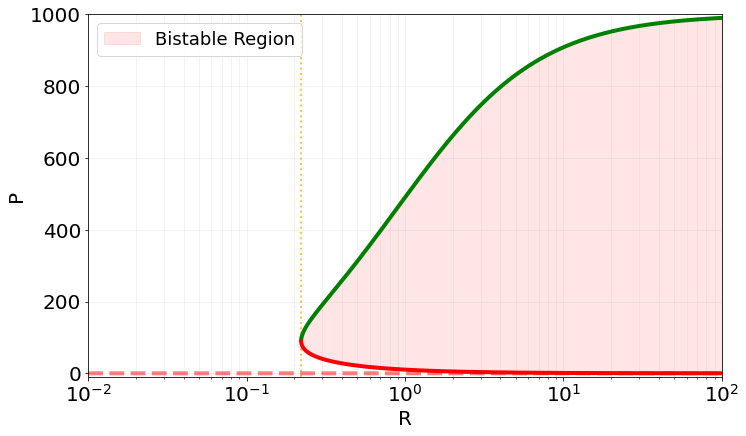

In [101]:
import numpy as np
import matplotlib.pyplot as plt

    
# Symbolic variables
var('DU DP2 DP2R P')

# Parameters 
D = 10
kplus = 100
kminus = 100
alpha = 100
gamma = 1
ktwoplus = 0.1
ktwominus = 1000

print("Analytical solved hysteresis - Deriving Quadratic Equation")

# Calculating coefficients 
c1 = kminus/kplus
c2 = (kminus*ktwominus)/(kplus*ktwoplus)

print(f"\nc1 = kminus/kplus = {c1}")
print(f"c2 = (kminus*ktwominus)/(kplus*ktwoplus) = {c2}")
print(f"\nQuadratic equation: P² + b(R)·P + c(R) = 0")
print(f"where:")
print(f"  b(R) = -(alpha/gamma)*D*R / (R + c1)")
print(f"  c(R) = c2 / (R + c1)")


# NUMERICAL SOLUTION 

print("Hysteresis Curve")

# logspaced Rp values
Rp_values = np.logspace(-2, 2, 10000)

# Calculating quadratic coefficients
b = -(alpha/gamma)*D*Rp_values / (Rp_values + c1)
c = c2 / (Rp_values + c1)

# Calculating discriminant
discriminant = b**2 - 4*c

# print(f"\nDiscriminant range: [{np.min(discriminant):.2f}, {np.max(discriminant):.2f}]")

# Finding where discriminant becomes positive
positive_mask = discriminant > 0
if np.any(positive_mask):
    first_positive = np.argmax(positive_mask)
    R_bistable_start = Rp_values[first_positive]
    print(f"Bistability begins at R = {R_bistable_start:.4f}")
#     print(f"Number of bistable points: {np.sum(positive_mask)}")
    
    # Extracting the bistable region
    Rp_bistable = Rp_values[first_positive:]
    b_bistable = b[first_positive:]
    c_bistable = c[first_positive:]
    disc_bistable = discriminant[first_positive:]
    
    # Two solutions from quadratic formula
    P1 = (-b_bistable + np.sqrt(disc_bistable)) / 2  # Upper branch
    P2 = (-b_bistable - np.sqrt(disc_bistable)) / 2  # Lower branch
    
    
    
else:
    print("WARNING: No bistable region found!")
    Rp_bistable = np.array([])
    P1 = np.array([])
    P2 = np.array([])


print("Solutions at Sample Points")

sample_Rp_explicit = [0.01, 1.0, 10.0, 100.0]

for Rp_val in sample_Rp_explicit:
    
    # Calculating values 
    b_val = -(alpha/gamma)*D*Rp_val / (Rp_val + c1)
    c_val = c2 / (Rp_val + c1)
    disc_val = b_val**2 - 4*c_val
    
    print(f"\nAnalytical calculation:")
    print(f"  b({Rp_val}) = {b_val:.4f}")
    print(f"  c({Rp_val}) = {c_val:.4f}")
    print(f"  Discriminant = {disc_val:.4f}")
    
    if disc_val > 0:
        P1_analytical = (-b_val + np.sqrt(disc_val)) / 2
        P2_analytical = (-b_val - np.sqrt(disc_val)) / 2
        print(f"  P1 (upper) = {P1_analytical:.4f}")
        print(f"  P2 (lower) = {P2_analytical:.4f}")
    else:
        print(f"  No bistability (discriminant < 0)")
        P1_analytical = 0
        P2_analytical = 0
    
# Plotting

fig, ax = plt.subplots(figsize=(10, 6))

# Zero line
P_zero = np.zeros_like(Rp_values)
ax.plot(Rp_values, P_zero, linewidth=4, color='red', linestyle='--', alpha=0.5)

# Plot hysteresis branches
if len(Rp_bistable) > 0:
    ax.plot(Rp_bistable, P1, linewidth=4, color='green', zorder=2)
    ax.plot(Rp_bistable, P2, linewidth=4, color='red', zorder=2)
    
    # Mark bistability region
    ax.axvline(R_bistable_start, color='orange', linestyle=':', linewidth=2, 
               alpha=0.7, zorder=1)
    
    # Add shaded region to show bistability
    ax.fill_between(Rp_bistable, P2, P1, alpha=0.1, color='red', label='Bistable Region', zorder=1)

ax.set_xscale('log')
ax.set_xlim(0.01, 101)
ax.set_ylim(-10, 1000)
ax.set_xlabel('R', fontsize=20)
ax.set_ylabel('P', fontsize=20)
ax.grid(True, which="both", lw=0.5, alpha=0.3)
ax.legend(fontsize=18, loc='upper left')
# ax.set_title('Hysteresis: Groebner Basis Verification (circles=upper, squares=lower)', fontsize=13)
plt.tight_layout()
ax.tick_params(axis='x', labelsize=20)  
ax.tick_params(axis='y', labelsize=20)
# plt.show()
plt.savefig('Hys.png', dpi=600, bbox_inches='tight')